In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import pickle
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier



In [ ]:
df = pd.read_csv('stackoverflow_full.csv')

In [ ]:
df.sample(5)

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
3472,3472,<35,No,Master,1,Man,No,Dev,14,6,Belgium,61616.0,C;C++;HTML/CSS;JavaScript;Python;R;Scala;Docke...,11.0,0.0
9993,9993,<35,No,Undergraduate,1,Man,No,Dev,5,2,United States of America,127000.0,Bash/Shell;HTML/CSS;Java;JavaScript;Python;SQL...,17.0,1.0
9571,9571,<35,No,Master,1,Woman,No,NotDev,10,4,Switzerland,45742.0,Bash/Shell;Python;Docker;Git,4.0,0.0
681,681,<35,No,Undergraduate,1,Man,No,Dev,5,2,India,3770.0,Java;Python;Git;MySQL;SQLite,5.0,0.0
3349,3349,<35,No,Undergraduate,1,Man,No,Dev,7,3,United States of America,52000.0,HTML/CSS;Java;Python;Ruby;Docker;Git;Yarn;jQue...,14.0,0.0


In [ ]:

# Check the dataset's structure, including columns, data types, missing values
data_structure_df = pd.DataFrame({
    'Column': df.columns,
    'Non-Null Count': df.count(),
    'Dtype': df.dtypes
}).reset_index(drop=True)

# Display the structure of the dataset
data_structure_df



,Column,Non-Null Count,Dtype
0,Unnamed: 0,11999,int64
1,Age,11999,object
2,Accessibility,11999,object
3,EdLevel,11999,object
4,Employment,11999,int64
5,Gender,11999,object
6,MentalHealth,11999,object
7,MainBranch,11999,object
8,YearsCode,11999,int64
9,YearsCodePro,11999,int64


In [ ]:
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)



Missing Values:
Unnamed: 0         0
Age                0
Accessibility      0
EdLevel            0
Employment         0
Gender             0
MentalHealth       0
MainBranch         0
YearsCode          0
YearsCodePro       0
Country            0
PreviousSalary     0
HaveWorkedWith    12
ComputerSkills     1
Employed           1
dtype: int64


In [ ]:
# Display general statistics
general_stats_df = df.describe(include='all').transpose()
general_stats_df

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,11986.0,NaN,NaN,NaN,0.31103,0.462934,0.0,0.0,0.0,1.0,1.0
Accessibility,11986.0,NaN,NaN,NaN,0.0282,0.16555,0.0,0.0,0.0,0.0,1.0
EdLevel,11986,5,undergraduate,6094,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Employment,11986.0,NaN,NaN,NaN,0.870349,0.335933,0.0,1.0,1.0,1.0,1.0
Gender,11986,3,man,11369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MentalHealth,11986.0,NaN,NaN,NaN,0.204572,0.403405,0.0,0.0,0.0,0.0,1.0
MainBranch,11986.0,NaN,NaN,NaN,0.078675,0.269242,0.0,0.0,0.0,0.0,1.0
YearsCode,11986.0,NaN,NaN,NaN,14.287836,9.218748,0.0,7.0,12.0,20.0,50.0
YearsCodePro,11986.0,NaN,NaN,NaN,8.631904,7.584165,0.0,3.0,6.0,12.0,50.0
Country,11986,143,united states of america,2380,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

Unnamed: 0        0
Age               0
Accessibility     0
EdLevel           0
Employment        0
Gender            0
MentalHealth      0
MainBranch        0
YearsCode         0
YearsCodePro      0
Country           0
PreviousSalary    0
HaveWorkedWith    0
ComputerSkills    0
Employed          0
dtype: int64

In [ ]:
df=df.drop(['Unnamed: 0'],axis=1)

In [ ]:
df.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4.0,0.0
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12.0,1.0
2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7.0,0.0
3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13.0,0.0
4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2.0,0.0


In [ ]:
# Normalize the 'Age' column
df['Age'] = df['Age'].apply(lambda x: x.strip())  # Remove any leading/trailing whitespace

# Ensure 'Employment' is a consistent integer format
df['Employment'] = df['Employment'].astype(int)

# Convert categorical columns to a consistent format (e.g., lowercase, titlecase)
categorical_columns = ['Accessibility', 'EdLevel', 'Gender', 'MentalHealth', 'MainBranch', 'Country']
for col in categorical_columns:
    df[col] = df[col].str.strip().str.lower()

# Standardize the 'HaveWorkedWith' column (splitting multi-value cells if needed)
df['HaveWorkedWith'] = df['HaveWorkedWith'].str.replace(';', ',').str.lower()

# Normalize salary data (if necessary, e.g., rounding or converting currency)
# Assuming all salaries are in the same currency, round them to the nearest integer
df['PreviousSalary'] = df['PreviousSalary'].round(0).astype(int)

# Ensure numerical consistency in 'YearsCode' and 'YearsCodePro'
df['YearsCode'] = df['YearsCode'].astype(int)
df['YearsCodePro'] = df['YearsCodePro'].astype(int)

# Handling 'Employed' and 'ComputerSkills' similarly
df['Employed'] = df['Employed'].astype(int)
df['ComputerSkills'] = df['ComputerSkills'].astype(int)

# Display the cleaned and normalized data
df.head()


,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,<35,no,master,1,man,no,dev,7,4,sweden,51552,"c++,python,git,postgresql",4,0
1,<35,no,undergraduate,1,man,no,dev,12,5,spain,46482,"bash/shell,html/css,javascript,node.js,sql,typ...",12,1
2,<35,no,master,1,man,no,dev,15,6,germany,77290,"c,c++,java,perl,ruby,git,ruby on rails",7,0
3,<35,no,undergraduate,1,man,no,dev,9,6,canada,46135,"bash/shell,html/css,javascript,php,ruby,sql,gi...",13,0
4,>35,no,phd,0,man,no,notdev,40,30,singapore,160932,"c++,python",2,0


In [ ]:
# Descriptive statistics for the numerical columns
numerical_columns = ['PreviousSalary', 'YearsCode', 'YearsCodePro', 'ComputerSkills', 'Employed']
descriptive_stats = df[numerical_columns].describe().transpose()

# Calculating additional statistics such as median
descriptive_stats['median'] = df[numerical_columns].median()

# Display the descriptive statistics
descriptive_stats

,count,mean,std,min,25%,50%,75%,max,median
PreviousSalary,11986.0,64074.930419,47424.906282,1.0,26556.0,54049.0,90000.0,222000.0,54049.0
YearsCode,11986.0,14.287836,9.218748,0.0,7.0,12.0,20.0,50.0,12.0
YearsCodePro,11986.0,8.631904,7.584165,0.0,3.0,6.0,12.0,50.0,6.0
ComputerSkills,11986.0,13.183381,6.671998,1.0,8.0,12.0,17.0,78.0,12.0
Employed,11986.0,0.499750,0.500021,0.0,0.0,0.0,1.0,1.0,0.0


Text(0, 0.5, 'Frequency')

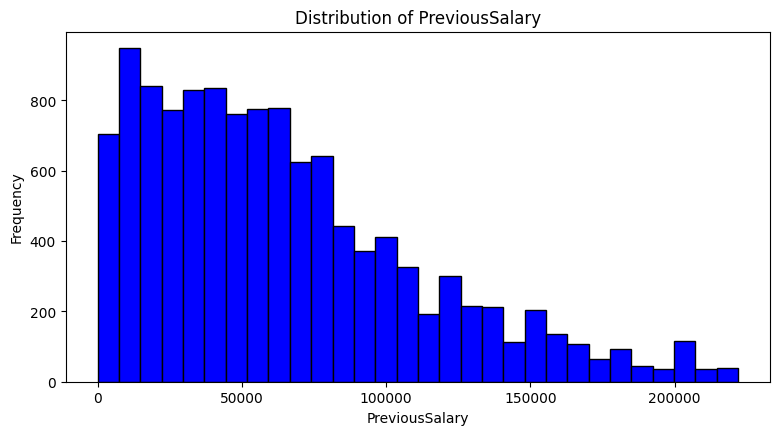

In [ ]:
# Visualizations
plt.figure(figsize=(20, 10))

# Histogram for 'PreviousSalary'
plt.hist(df['PreviousSalary'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of PreviousSalary')
plt.xlabel('PreviousSalary')
plt.ylabel('Frequency')

Text(0, 0.5, 'PreviousSalary')

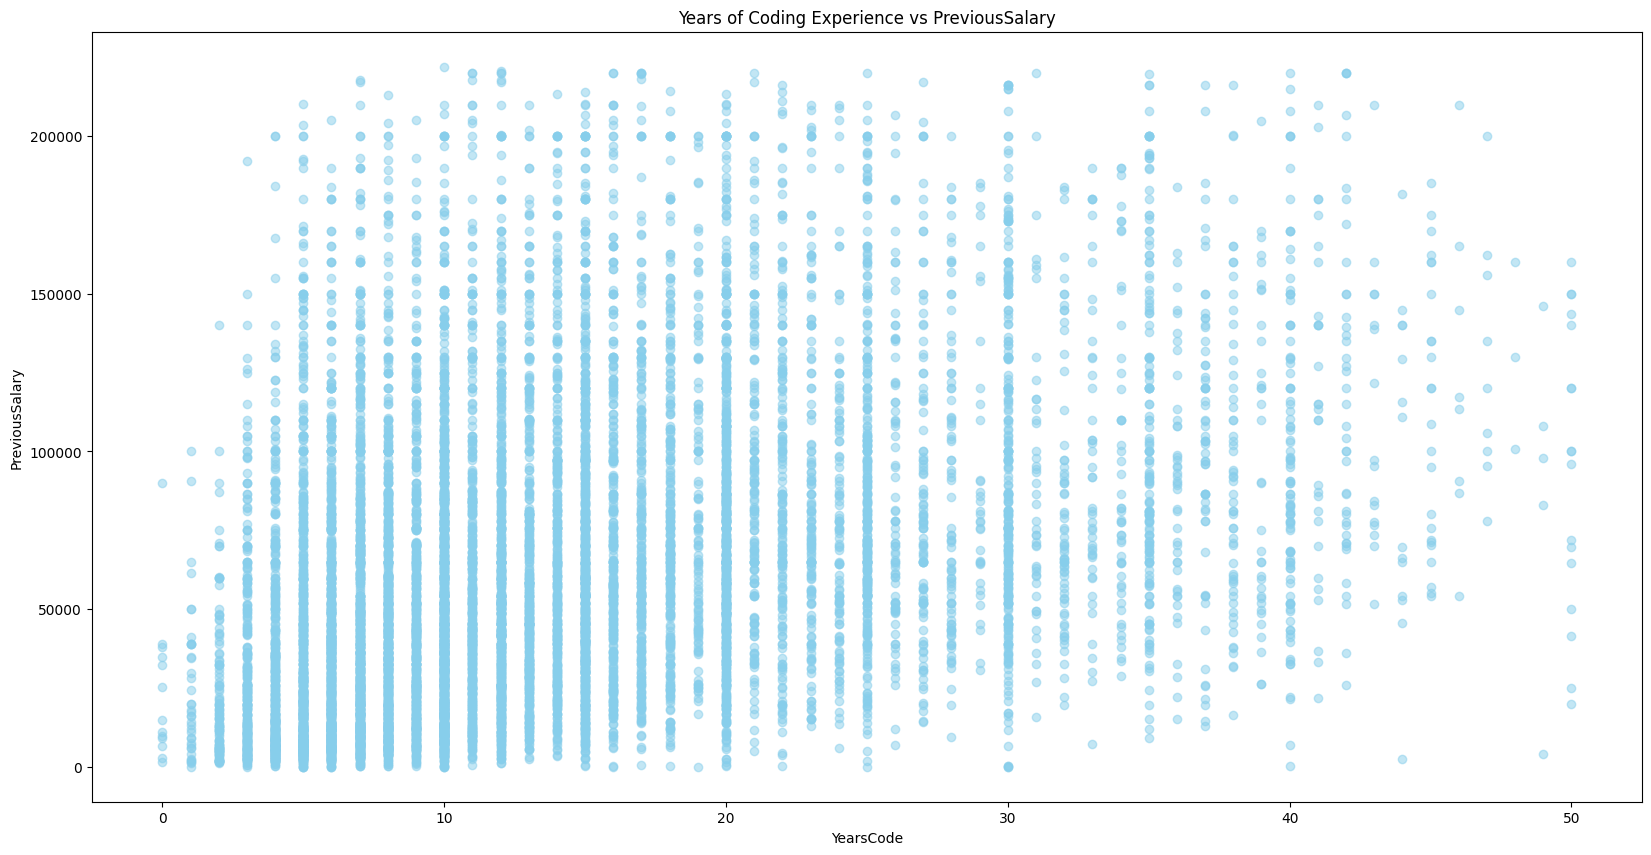

In [ ]:
#Scatter plot for 'YearsCode' vs 'PreviousSalary'
plt.figure(figsize=(20, 10))
plt.scatter(df['YearsCode'], df['PreviousSalary'], alpha=0.5, color='skyblue')
plt.title('Years of Coding Experience vs PreviousSalary')
plt.xlabel('YearsCode')
plt.ylabel('PreviousSalary')

Text(0, 0.5, 'Count')

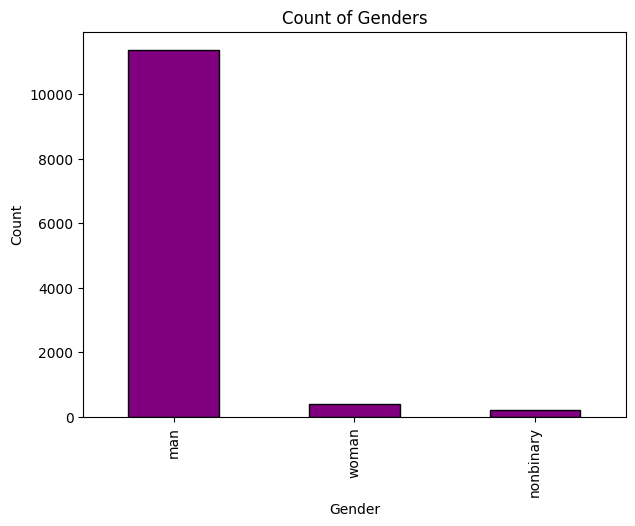

In [ ]:
# Bar plot for 'Gender'
plt.figure(figsize=(7, 5))
df['Gender'].value_counts().plot(kind='bar', color='purple', edgecolor='black')
plt.title('Count of Genders')
plt.xlabel('Gender')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

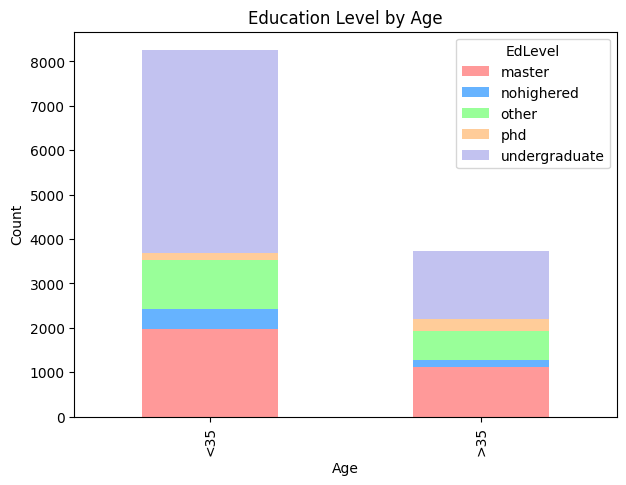

In [ ]:
# 1. Education Level with Age
plt.figure(figsize=(7, 5))
df.groupby(['Age', 'EdLevel']).size().unstack().plot(kind='bar', stacked=True, ax=plt.gca(),
    color=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
plt.title('Education Level by Age')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Average Computer Skills')

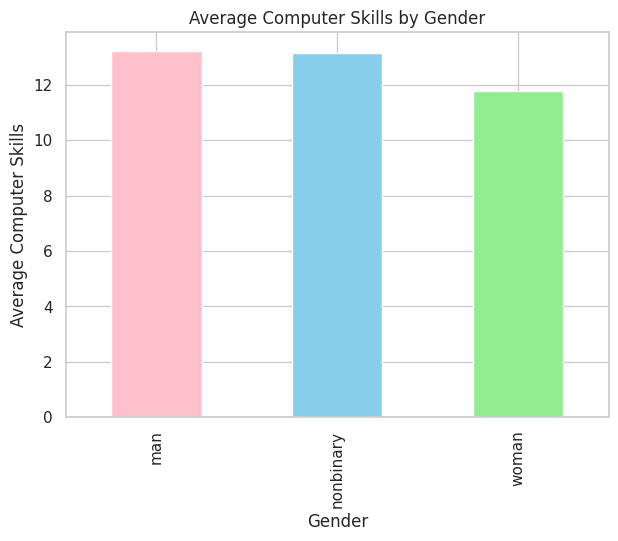

In [ ]:
plt.figure(figsize=(7, 5))
df.groupby('Gender')['ComputerSkills'].mean().plot(kind='bar', ax=plt.gca(),
    color=['pink','skyblue','lightgreen'])
plt.title('Average Computer Skills by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Computer Skills')

Text(0, 0.5, 'Average Computer Skills')

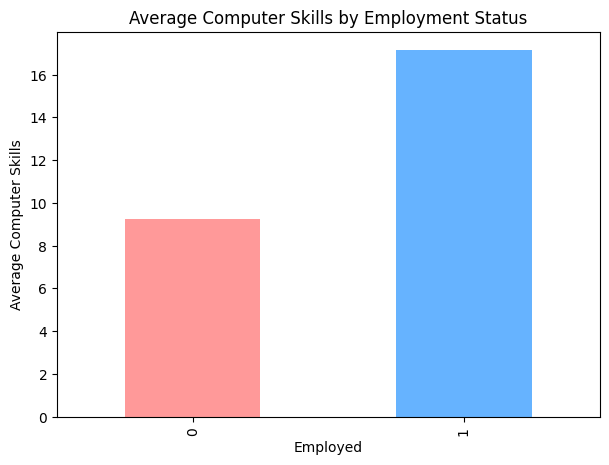

In [ ]:
# 3. Average Computer Skills by Employment Status
plt.figure(figsize=(7, 5))
df.groupby('Employed')['ComputerSkills'].mean().plot(kind='bar', ax=plt.gca(),
    color=['pink','skyblue'])
plt.title('Average Computer Skills by Employment Status')
plt.xlabel('Employed')
plt.ylabel('Average Computer Skills')

Text(0, 0.5, 'Number of Employed Individuals')

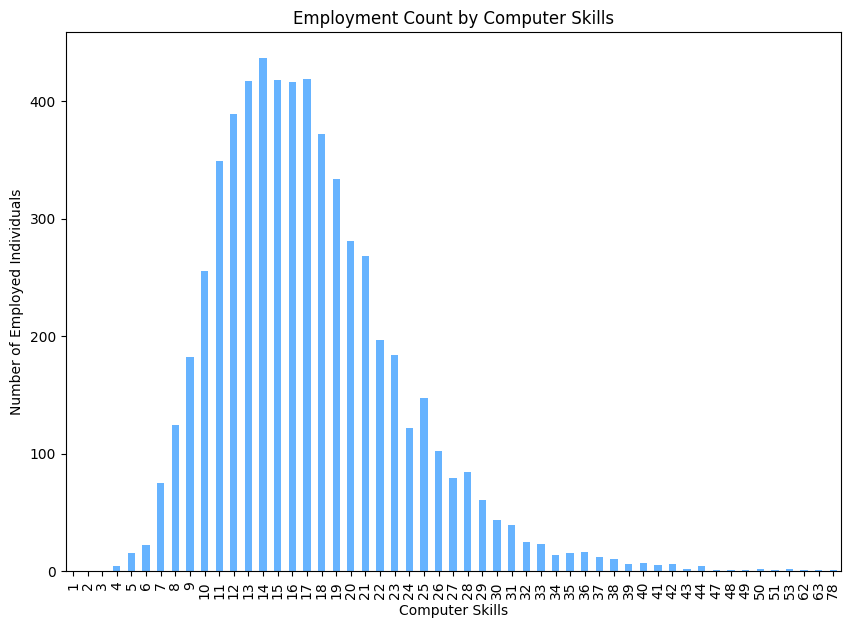

In [ ]:
plt.figure(figsize=(10, 7))

df.groupby('ComputerSkills')['Employed'].sum().plot(kind='bar', ax=plt.gca(), color='skyblue')
plt.title('Employment Count by Computer Skills')
plt.xlabel('Computer Skills')
plt.ylabel('Number of Employed Individuals')


Text(0, 0.5, 'Employment Count')

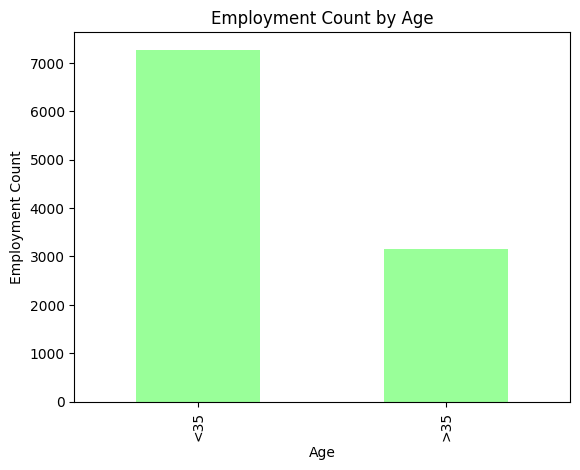

In [ ]:
df.groupby('Age')['Employment'].sum().plot(kind='bar', ax=plt.gca(), color='lightgreen')
plt.title('Employment Count by Age')
plt.xlabel('Age')
plt.ylabel('Employment Count')

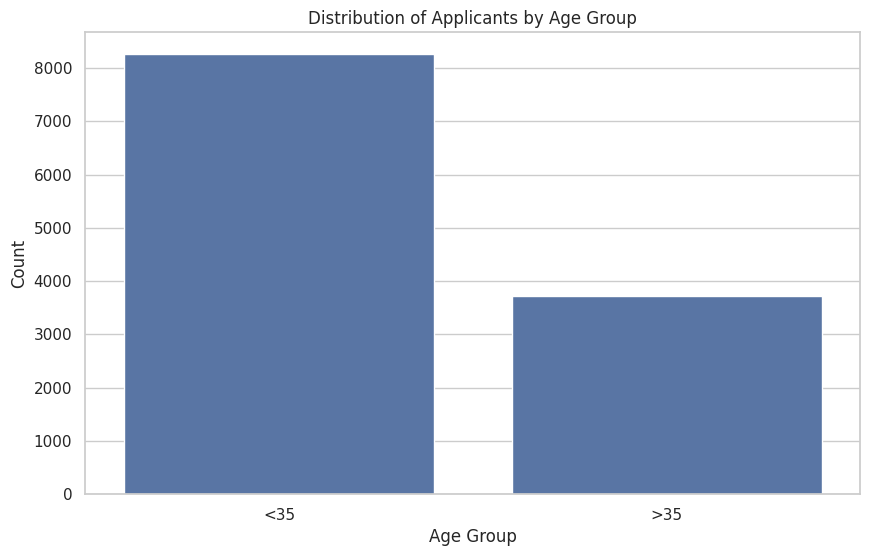

In [ ]:
# Set up the visual style
sns.set(style="whitegrid")

# Plotting the distribution of ages
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', data=df)
plt.title('Distribution of Applicants by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()



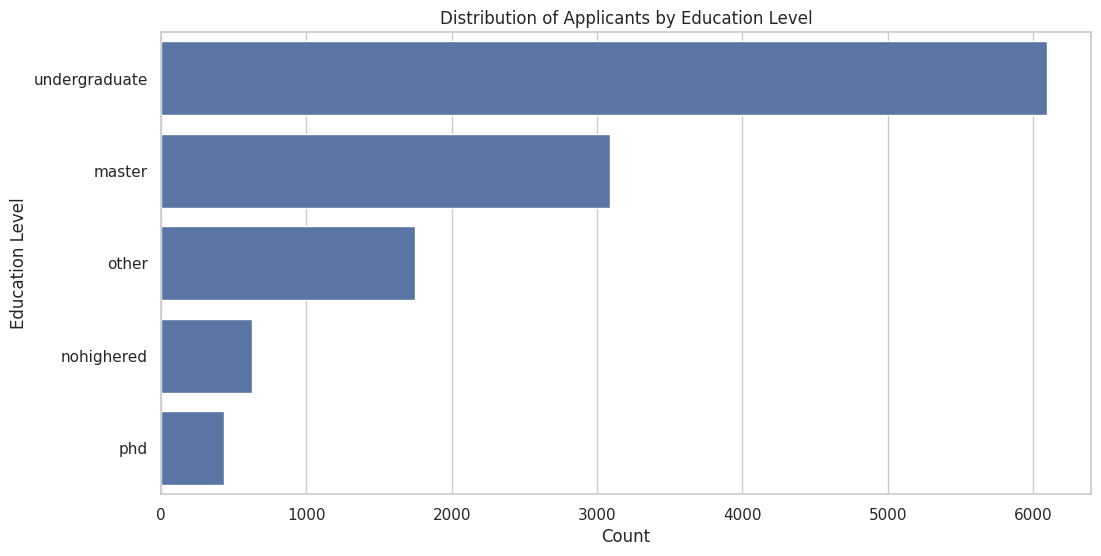

In [ ]:
# Plotting the distribution of education levels
plt.figure(figsize=(12, 6))
sns.countplot(y='EdLevel', data=df, order=df['EdLevel'].value_counts().index)
plt.title('Distribution of Applicants by Education Level')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.show()



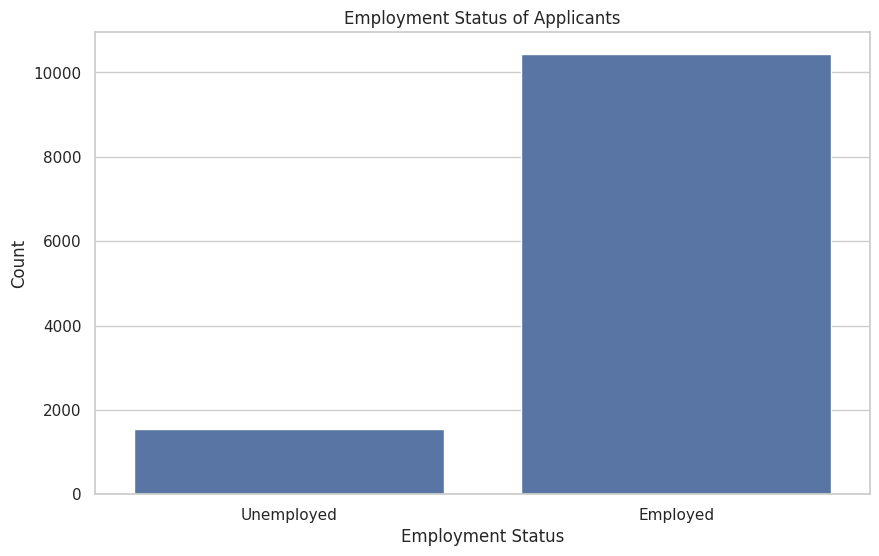

In [ ]:
# Plotting the distribution of employment status
plt.figure(figsize=(10, 6))
sns.countplot(x='Employment', data=df)
plt.title('Employment Status of Applicants')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['Unemployed', 'Employed'])
plt.show()



Text(0, 0.5, 'Count')

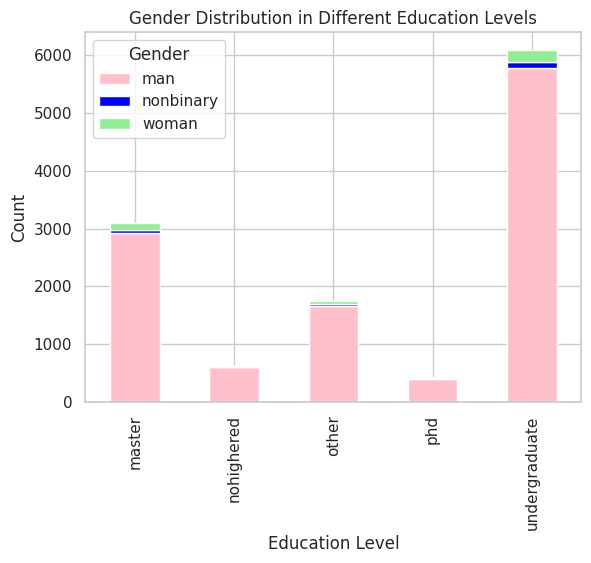

In [ ]:
df.groupby(['EdLevel', 'Gender']).size().unstack().plot(kind='bar', stacked=True, ax=plt.gca(),
    color=['pink','blue','lightgreen'])
plt.title('Gender Distribution in Different Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

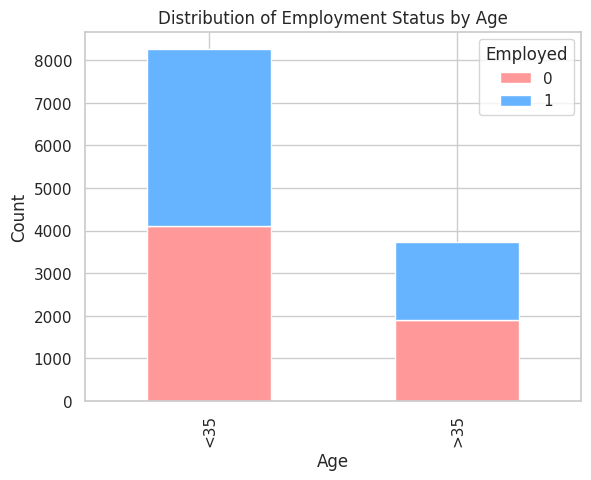

In [ ]:
df.groupby(['Age', 'Employed']).size().unstack().plot(kind='bar', stacked=True, ax=plt.gca(),
    color=['#ff9999','#66b3ff'])
plt.title('Distribution of Employment Status by Age')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Computer Skills')

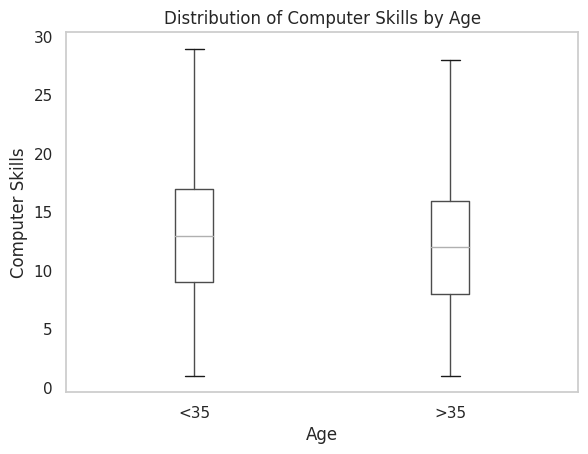

In [ ]:
df.boxplot(column='ComputerSkills', by='Age', ax=plt.gca(), grid=False, showfliers=False)
plt.title('Distribution of Computer Skills by Age')
plt.suptitle('')  # Suppress the automatic subtitle
plt.xlabel('Age')
plt.ylabel('Computer Skills')

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 [Text(1, 0, '0'),
  Text(2, 0, '1'),
  Text(3, 0, '2'),
  Text(4, 0, '3'),
  Text(5, 0, '4'),
  Text(6, 0, '5'),
  Text(7, 0, '6'),
  Text(8, 0, '7'),
  Text(9, 0, '8'),
  Text(10, 0, '9'),
  Text(11, 0, '10'),
  Text(12, 0, '11'),
  Text(13, 0, '12'),
  Text(14, 0, '13'),
  Text(15, 0, '14'),
  Text(16, 0, '15'),
  Text(17, 0, '16'),
  Text(18, 0, '17'),
  Text(19, 0, '18'),
  Text(20, 0, '19'),
  Text(21, 0, '20'),
  Text(22, 0, '21'),
  Text(23, 0, '22'),
  Text(24, 0, '23'),
  Text(25, 0, '24'),
  Text(26, 0, '25'),
  Text(27, 0, '26'),
  Text(28, 0, '27'),
  Text(29, 0, '28'),
  Text(30, 0, '29'),
  Text(31, 0, '30'),
  Text(32, 0, '31'),
  Text(33, 0, '32'),
  Text(34, 0, '33'),
  Text(35, 0, '34'),
  Text(36, 0, '35'),
  Text(37, 0, '36'),
  Text(38, 0, '37'),
  T

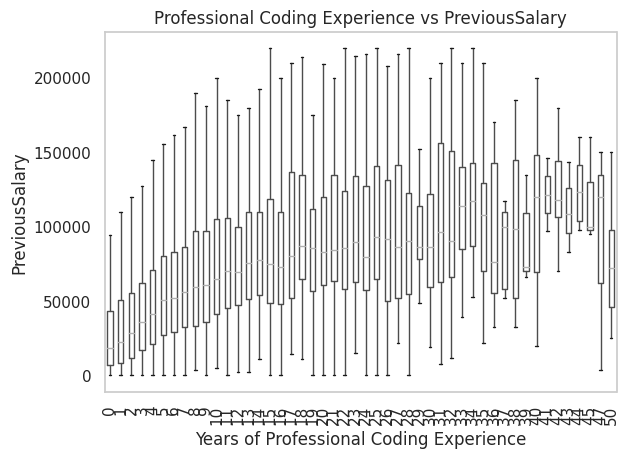

In [ ]:
df.boxplot(column='PreviousSalary', by='YearsCodePro', ax=plt.gca(), grid=False, showfliers=False)
plt.title('Professional Coding Experience vs PreviousSalary')
plt.suptitle('')  # Suppress the automatic subtitle
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('PreviousSalary')
plt.xticks(rotation=90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53]),
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 0, '35'),
  Text(36, 0, '36'),
  Text(37, 0, '3

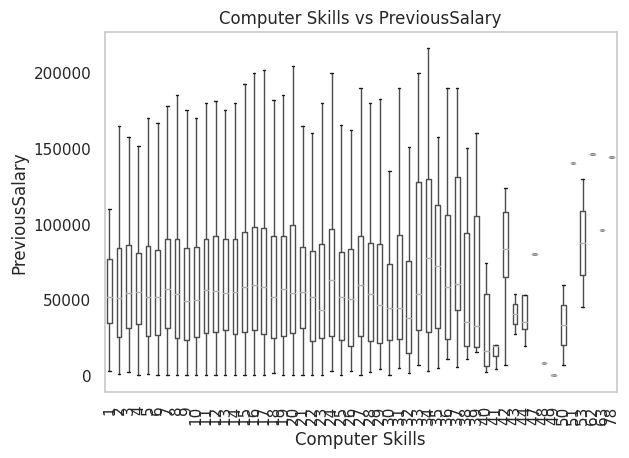

In [ ]:
df.boxplot(column='PreviousSalary', by='ComputerSkills', ax=plt.gca(), grid=False, showfliers=False)
plt.title('Computer Skills vs PreviousSalary')
plt.suptitle('')  # Suppress the automatic subtitle
plt.xlabel('Computer Skills')
plt.ylabel('PreviousSalary')
plt.xticks(rotation=90)

In [ ]:
# Convert relevant columns to numerical where needed
df['PreviousSalary'] = df['PreviousSalary'].replace({0: np.nan})
df['YearsCode'] = pd.to_numeric(df['YearsCode'], errors='coerce')
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['ComputerSkills'] = pd.to_numeric(df['ComputerSkills'], errors='coerce')
df['Employment'] = pd.to_numeric(df['Employment'], errors='coerce')

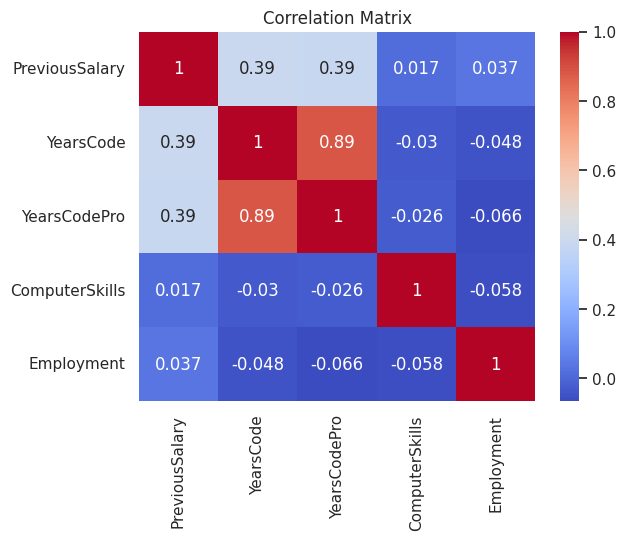

In [ ]:
# Correlation matrix for numerical features
corr_matrix = df[['PreviousSalary', 'YearsCode', 'YearsCodePro', 'ComputerSkills', 'Employment']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


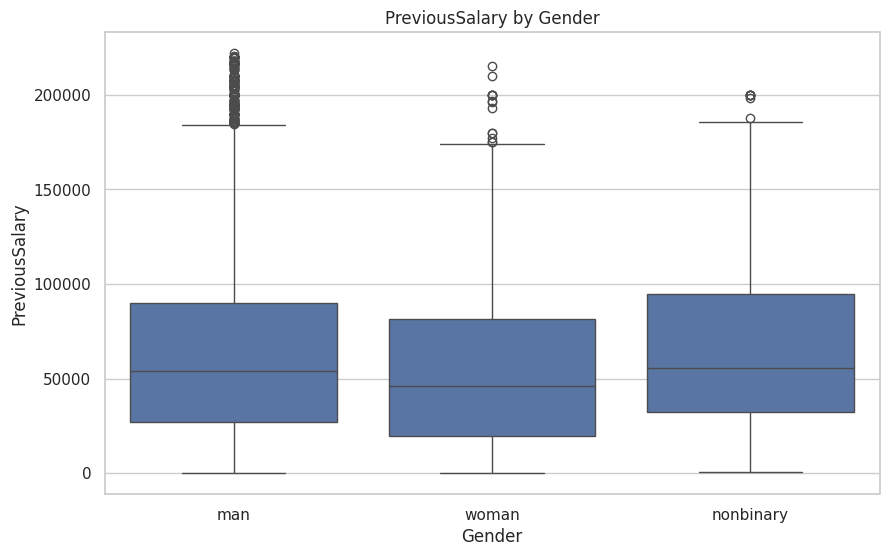

In [ ]:
# Group comparisons - Box plot for Salary by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='PreviousSalary', data=df)
plt.title('PreviousSalary by Gender')
plt.xlabel('Gender')
plt.ylabel('PreviousSalary')
plt.show()

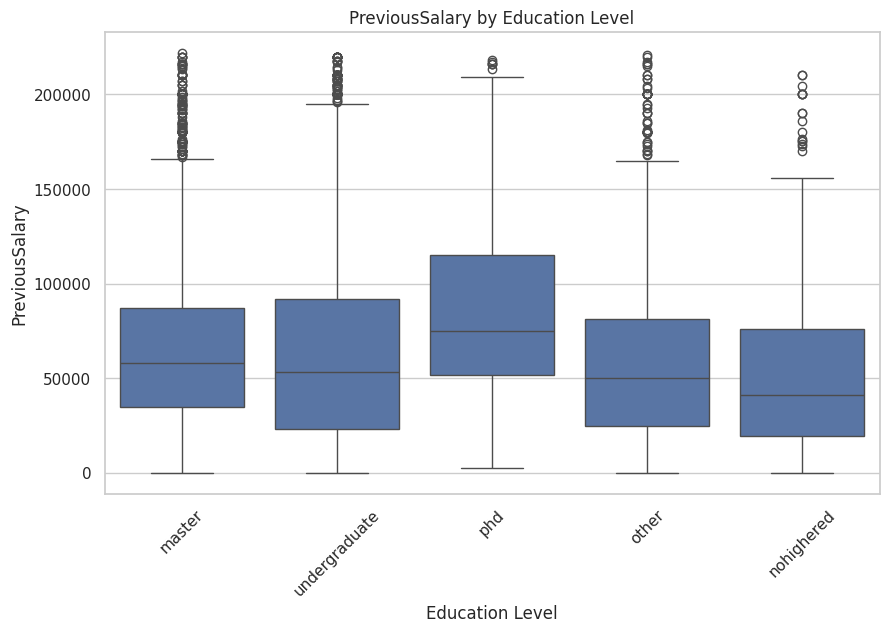

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='EdLevel', y='PreviousSalary', data=df)
plt.title('PreviousSalary by Education Level')
plt.xlabel('Education Level')
plt.ylabel('PreviousSalary')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Function to cap outliers (Winsorize) based on the IQR method
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)
    return data

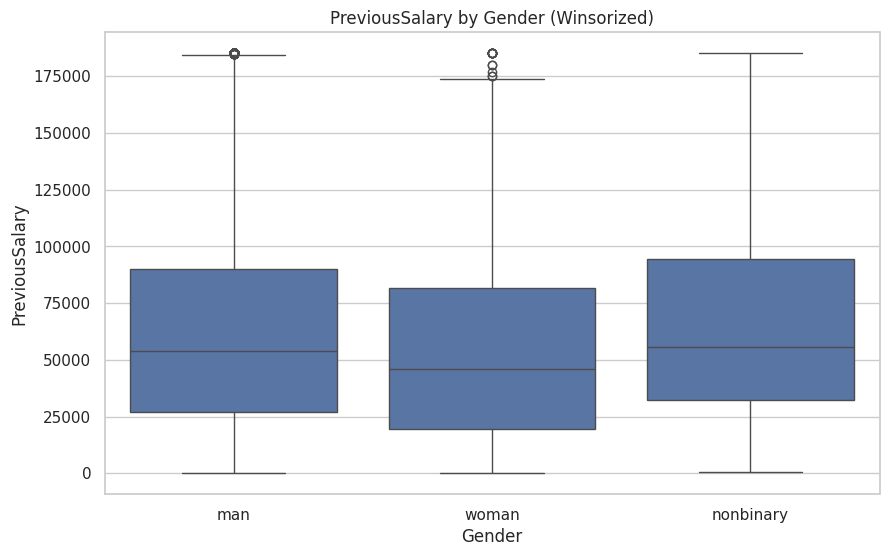

In [ ]:
# Apply Winsorization to 'PreviousSalary' to cap the outliers consistently
df_winsorized = cap_outliers(df.copy(), 'PreviousSalary')

# Group comparisons - Box plot for Salary by Gender after capping
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='PreviousSalary', data=df_winsorized)
plt.title('PreviousSalary by Gender (Winsorized)')
plt.xlabel('Gender')
plt.ylabel('PreviousSalary')
plt.show()

In [ ]:
#  Experience Levels
def categorize_experience(years):
    if years < 2:
        return 'Beginner'
    elif 2 <= years < 5:
        return 'Intermediate'
    elif 5 <= years < 10:
        return 'Advanced'
    else:
        return 'Expert'

df['ExperienceLevel'] = df['YearsCodePro'].apply(categorize_experience)


In [ ]:

#  Salary Bracket
def categorize_salary(salary):
    if salary < 30000:
        return 'Low'
    elif 30000 <= salary < 60000:
        return 'Medium'
    elif 60000 <= salary < 100000:
        return 'High'
    else:
        return 'Very High'

df['SalaryBracket'] = df['PreviousSalary'].apply(categorize_salary)



In [ ]:
# Technical vs. Non-Technical Roles
def is_technical(main_branch, tech_stack):
    if main_branch == 'Dev' or 'Developer' in tech_stack:
        return 'Technical'
    else:
        return 'Non-Technical'

df['RoleType'] = df.apply(lambda row: is_technical(row['MainBranch'], row['HaveWorkedWith']), axis=1)



In [ ]:
#  Education and Skill Interaction
df['EdLevel_Skills'] = df['EdLevel'] + '_' + df['ComputerSkills'].astype(str)



In [ ]:
#  Age Group
def categorize_age(age):
    age = age.strip('<>')
    if age == '':
        return 'Unknown'
    age = int(age)
    if age < 25:
        return 'Young'
    elif 25 <= age < 35:
        return 'Mid'
    elif 35 <= age < 50:
        return 'Senior'
    else:
        return 'Veteran'

df['AgeGroup'] = df['Age'].apply(categorize_age)



In [ ]:
def categorize_skills(skills):
    if skills < 5:
        return 'Novice'
    elif 5 <= skills < 10:
        return 'Intermediate'
    elif 10 <= skills < 15:
        return 'Advanced'
    else:
        return 'Expert'
df['SkillLevel'] = df['ComputerSkills'].apply(categorize_skills)


In [ ]:
# Display the first few rows with new features
df.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed,ExperienceLevel,SalaryBracket,RoleType,EdLevel_Skills,AgeGroup,SkillLevel
0,<35,no,master,1,man,no,dev,7,4,sweden,51552,"c++,python,git,postgresql",4,0,Intermediate,Medium,Non-Technical,master_4,Senior,Novice
1,<35,no,undergraduate,1,man,no,dev,12,5,spain,46482,"bash/shell,html/css,javascript,node.js,sql,typ...",12,1,Advanced,Medium,Non-Technical,undergraduate_12,Senior,Advanced
2,<35,no,master,1,man,no,dev,15,6,germany,77290,"c,c++,java,perl,ruby,git,ruby on rails",7,0,Advanced,High,Non-Technical,master_7,Senior,Intermediate
3,<35,no,undergraduate,1,man,no,dev,9,6,canada,46135,"bash/shell,html/css,javascript,php,ruby,sql,gi...",13,0,Advanced,Medium,Non-Technical,undergraduate_13,Senior,Advanced
4,>35,no,phd,0,man,no,notdev,40,30,singapore,160932,"c++,python",2,0,Expert,Very High,Non-Technical,phd_2,Senior,Novice


<ipython-input-46-d51e1f1a3f91>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SalaryBracket', data=df, palette='viridis')


Text(0, 0.5, 'Count')

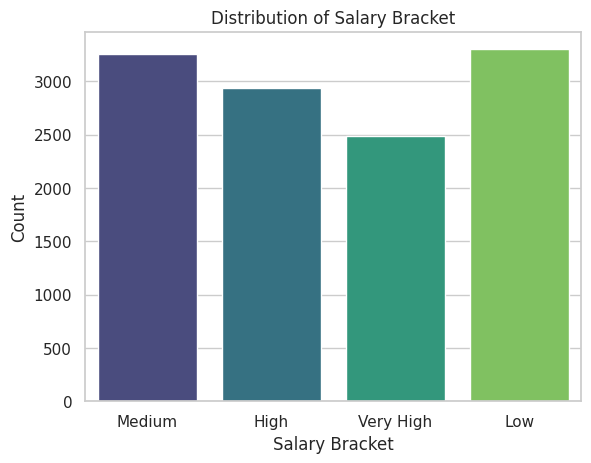

In [ ]:
#  Distribution of Salary Bracket
sns.countplot(x='SalaryBracket', data=df, palette='viridis')
plt.title('Distribution of Salary Bracket')
plt.xlabel('Salary Bracket')
plt.ylabel('Count')

<ipython-input-47-1d9c8e9cd7b9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ExperienceLevel', data=df, palette='muted')


Text(0, 0.5, 'Count')

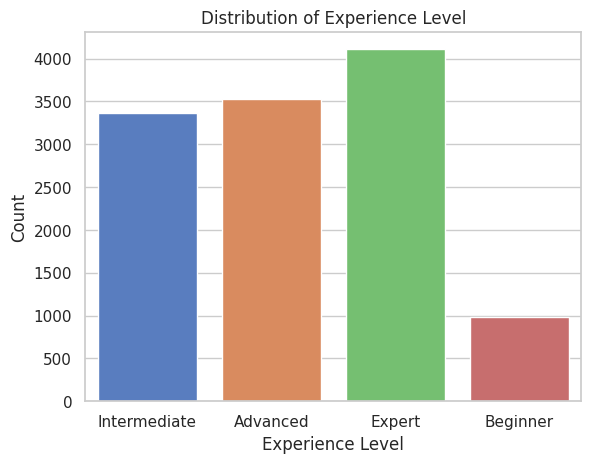

In [ ]:
#  Distribution of Experience Level
sns.countplot(x='ExperienceLevel', data=df, palette='muted')
plt.title('Distribution of Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Count')

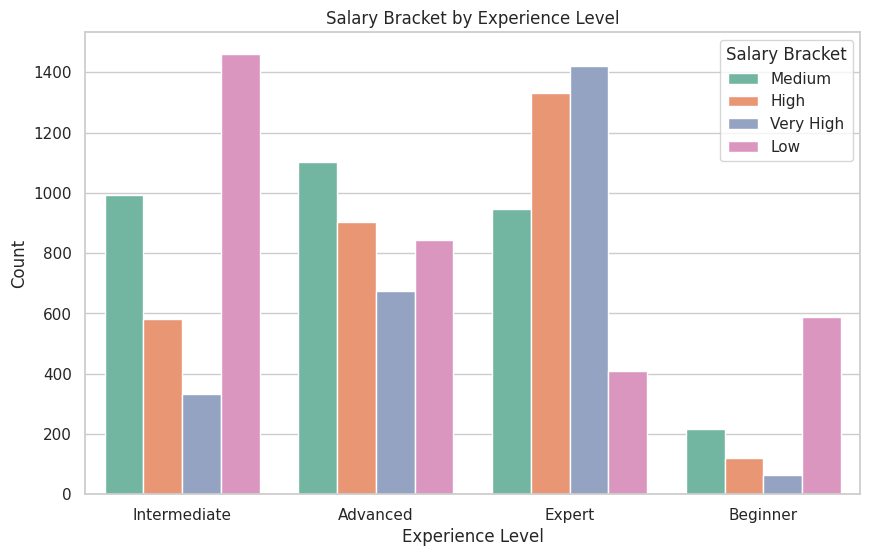

In [ ]:
#  Salary Bracket by Experience Level
plt.figure(figsize=(10, 6))

sns.countplot(x='ExperienceLevel', hue='SalaryBracket', data=df, palette='Set2')
plt.title('Salary Bracket by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.legend(title='Salary Bracket')

<ipython-input-49-15360b77a701>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SkillLevel', data=df, palette='coolwarm')


Text(0, 0.5, 'Count')

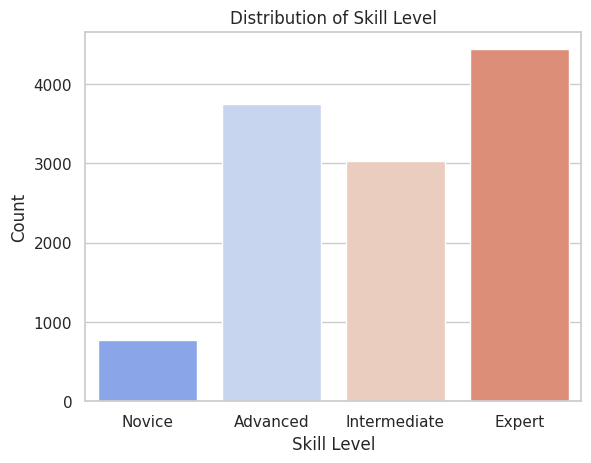

In [ ]:
sns.countplot(x='SkillLevel', data=df, palette='coolwarm')
plt.title('Distribution of Skill Level')
plt.xlabel('Skill Level')
plt.ylabel('Count')

In [ ]:
# Preprocessing for the tests
df = df.dropna(subset=['PreviousSalary', 'Gender', 'EdLevel', 'Employed', 'YearsCodePro', 'ComputerSkills'])
df['Gender'] = df['Gender'].str.strip().str.lower()

In [ ]:
#  Two-sample t-test for Gender and Salary
male_salaries = df[df['Gender'] == 'man']['PreviousSalary']
female_salaries = df[df['Gender'] == 'woman']['PreviousSalary']
t_stat, p_value_gender_salary = stats.ttest_ind(male_salaries, female_salaries, equal_var=False)


In [ ]:
#  Chi-square test for Education Level and Employment
contingency_table = pd.crosstab(df['EdLevel'], df['Employed'])
chi2, p_value_education_employment, _, _ = stats.chi2_contingency(contingency_table)



In [ ]:
#  Pearson correlation for Experience Level and Skill Level
correlation_experience_skill, p_value_experience_skill = stats.pearsonr(df['YearsCodePro'], df['ComputerSkills'])


In [ ]:
# Output the results
print(f"T-test Gender vs Salary: t-statistic = {t_stat:.2f}, p-value = {p_value_gender_salary:.4f}")
print(f"Chi-square Test EdLevel vs Employment: chi2 = {chi2:.2f}, p-value = {p_value_education_employment:.4f}")
print(f"Pearson Correlation Experience vs Skills: correlation = {correlation_experience_skill:.2f}, p-value = {p_value_experience_skill:.4f}")

T-test Gender vs Salary: t-statistic = 2.14, p-value = 0.0331
Chi-square Test EdLevel vs Employment: chi2 = 152.77, p-value = 0.0000
Pearson Correlation Experience vs Skills: correlation = -0.03, p-value = 0.0049


In [ ]:
df.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed,ExperienceLevel,SalaryBracket,RoleType,EdLevel_Skills,AgeGroup,SkillLevel
0,<35,no,master,1,man,no,dev,7,4,sweden,51552,"c++,python,git,postgresql",4,0,Intermediate,Medium,Non-Technical,master_4,Senior,Novice
1,<35,no,undergraduate,1,man,no,dev,12,5,spain,46482,"bash/shell,html/css,javascript,node.js,sql,typ...",12,1,Advanced,Medium,Non-Technical,undergraduate_12,Senior,Advanced
2,<35,no,master,1,man,no,dev,15,6,germany,77290,"c,c++,java,perl,ruby,git,ruby on rails",7,0,Advanced,High,Non-Technical,master_7,Senior,Intermediate
3,<35,no,undergraduate,1,man,no,dev,9,6,canada,46135,"bash/shell,html/css,javascript,php,ruby,sql,gi...",13,0,Advanced,Medium,Non-Technical,undergraduate_13,Senior,Advanced
4,>35,no,phd,0,man,no,notdev,40,30,singapore,160932,"c++,python",2,0,Expert,Very High,Non-Technical,phd_2,Senior,Novice


In [ ]:
# Verify if any column is non-numeric or contains non-numeric data
print(df.dtypes[df.dtypes == 'object'])

Age                object
Accessibility      object
EdLevel            object
Gender             object
MentalHealth       object
MainBranch         object
Country            object
HaveWorkedWith     object
ExperienceLevel    object
SalaryBracket      object
RoleType           object
EdLevel_Skills     object
AgeGroup           object
SkillLevel         object
dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Check high cardinality columns
cardinality = df.nunique()
high_cardinality_columns = cardinality[cardinality > 100].index.tolist()
print(f"High cardinality columns: {high_cardinality_columns}")

# Example of handling high cardinality feature 'HaveWorkedWith' by counting the number of technologies
if 'HaveWorkedWith' in df.columns:
    df['NumTechnologies'] = df['HaveWorkedWith'].apply(lambda x: len(str(x).split(',')) if pd.notnull(x) else 0)
    df.drop(columns=['HaveWorkedWith'], inplace=True)  # Remove original high cardinality column

# Use Label Encoding for binary features
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    if df[column].nunique() == 2:
        df[column] = label_encoder.fit_transform(df[column])

# Handle remaining multi-categorical features with reasonable cardinality
df_encoded = pd.get_dummies(df, drop_first=True)

# Display the number of columns to verify reduction
print(f"Number of columns after encoding: {df_encoded.shape[1]}")

# Check if data types are correct and all are numeric
print(df_encoded.dtypes)


High cardinality columns: ['Country', 'PreviousSalary', 'EdLevel_Skills']
Number of columns after encoding: 377
Age                               int64
Accessibility                     int64
Employment                        int64
MentalHealth                      int64
MainBranch                        int64
                                  ...  
EdLevel_Skills_undergraduate_8     bool
EdLevel_Skills_undergraduate_9     bool
SkillLevel_Expert                  bool
SkillLevel_Intermediate            bool
SkillLevel_Novice                  bool
Length: 377, dtype: object


In [ ]:
# Define the features (X) and target (y)
X = df_encoded.drop(columns=['Employed'])  # Use all columns except 'Employed' as features
y = df_encoded['Employed']  # 'Employed' column as the target variable


In [ ]:
# Save the encoded DataFrame to a new file
encoded_data_file_path = 'Stockoverflow_encoded_data.csv'
df_encoded.to_csv(encoded_data_file_path, index=False)

print(f"Encoded data saved to {encoded_data_file_path}")

Encoded data saved to Stockoverflow_encoded_data.csv


In [ ]:
X.head()

,Age,Accessibility,Employment,MentalHealth,MainBranch,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,NumTechnologies,...,EdLevel_Skills_undergraduate_50,EdLevel_Skills_undergraduate_51,EdLevel_Skills_undergraduate_53,EdLevel_Skills_undergraduate_6,EdLevel_Skills_undergraduate_7,EdLevel_Skills_undergraduate_8,EdLevel_Skills_undergraduate_9,SkillLevel_Expert,SkillLevel_Intermediate,SkillLevel_Novice
0,0,0,1,0,0,7,4,51552,4,4,...,False,False,False,False,False,False,False,False,False,True
1,0,0,1,0,0,12,5,46482,12,12,...,False,False,False,False,False,False,False,False,False,False
2,0,0,1,0,0,15,6,77290,7,7,...,False,False,False,False,False,False,False,False,True,False
3,0,0,1,0,0,9,6,46135,13,13,...,False,False,False,False,False,False,False,False,False,False
4,1,0,0,0,1,40,30,160932,2,2,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
y

0        0
1        1
2        0
3        0
4        0
        ..
11993    0
11994    0
11995    0
11996    0
11997    1
Name: Employed, Length: 11986, dtype: int64

In [ ]:
# Split the data: 80% train/validation and 20% test
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Further split the training data into 70% training and 30% validation
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.3, random_state=42)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(random_state=10, max_iter=3000),
    "Random Forest": RandomForestClassifier(random_state=20),
    "Decision Tree": DecisionTreeClassifier(random_state=5)
}

In [ ]:
# Import necessary library for log loss
from sklearn.metrics import log_loss

# Initialize the model_performance dictionary
model_performance = {}

# Train and evaluate each model
for model_name, model in models.items():
    try:
        # Train the model
        model.fit(X_train, y_train)

        # Predict on validation set
        y_val_pred = model.predict(X_val)
        y_train_pred = model.predict(X_train)

        # Evaluate the model
        val_accuracy = accuracy_score(y_val, y_val_pred)
        train_accuracy = accuracy_score(y_train, y_train_pred)

        # For training loss, assuming models have a `predict_proba` method
        if hasattr(model, 'predict_proba'):
            train_loss = log_loss(y_train, model.predict_proba(X_train))
            val_loss = log_loss(y_val, model.predict_proba(X_val))
        else:
            # For models without predict_proba (e.g., SVM without probability=True), we will use a workaround
            # Since log_loss requires probabilities, this block is a placeholder
            # You may need to customize it based on available model methods
            train_loss = None  # Handle appropriately for your case
            val_loss = None  # Handle appropriately for your case

        val_report = classification_report(y_val, y_val_pred)

        # Store the performance metrics
        model_performance[model_name] = {
            "train_accuracy": train_accuracy,
            "train_loss": train_loss,
            "validation_accuracy": val_accuracy,
            "validation_loss": val_loss,
            "validation_report": val_report
        }

        # Save the trained model
        with open(f'{model_name.replace(" ", "_").lower()}_model.pkl', 'wb') as f:
            pickle.dump(model, f)

    except Exception as e:
        print(f"Error occurred with model {model_name}: {e}")
        model_performance[model_name] = {
            "train_accuracy": None,
            "train_loss": None,
            "validation_accuracy": None,
            "validation_loss": None,
            "validation_report": f"Error: {e}"
        }

# Display model performance including training accuracy and loss, and validation accuracy and loss
for model_name, performance in model_performance.items():
    print(f"{model_name} Training Accuracy: {performance.get('train_accuracy', 'N/A'):.4f}")
    print(f"{model_name} Training Loss: {performance.get('train_loss', 'N/A')}")
    print(f"{model_name} Validation Accuracy: {performance.get('validation_accuracy', 'N/A'):.4f}")
    print(f"{model_name} Validation Loss: {performance.get('validation_loss', 'N/A')}")
    print(f"{model_name} Validation Report:\n{performance['validation_report']}")


Logistic Regression Training Accuracy: 0.6984
Logistic Regression Training Loss: 0.5694815112198013
Logistic Regression Validation Accuracy: 0.7004
Logistic Regression Validation Loss: 0.5705358001076368
Logistic Regression Validation Report:
              precision    recall  f1-score   support

           0       0.77      0.59      0.67      1465
           1       0.66      0.81      0.73      1412

    accuracy                           0.70      2877
   macro avg       0.71      0.70      0.70      2877
weighted avg       0.71      0.70      0.70      2877

Random Forest Training Accuracy: 1.0000
Random Forest Training Loss: 0.12362114567926158
Random Forest Validation Accuracy: 0.7633
Random Forest Validation Loss: 0.5676939388572694
Random Forest Validation Report:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1465
           1       0.74      0.80      0.77      1412

    accuracy                           0.76      287

In [ ]:
# Load and evaluate all models on the test set
test_performance = {}

# Iterate over each model stored in model_performance
for model_name in model_performance.keys():
    try:
        # Load the model
        with open(f'{model_name.replace(" ", "_").lower()}_model.pkl', 'rb') as f:
            model = pickle.load(f)

        # Predict on the test set
        y_test_pred = model.predict(X_test)

        # Calculate test accuracy and report
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_report = classification_report(y_test, y_test_pred)

        # Store the test performance metrics
        test_performance[model_name] = {
            "test_accuracy": test_accuracy,
            "test_report": test_report
        }

    except Exception as e:
        print(f"Error occurred while evaluating {model_name}: {e}")
        test_performance[model_name] = {
            "test_accuracy": None,
            "test_report": f"Error: {e}"
        }

# Print the test performance for each model
for model_name, performance in test_performance.items():
    print(f"Test Accuracy for {model_name}: {performance['test_accuracy']:.4f}")
    print(f"Test Report for {model_name}:\n{performance['test_report']}")


Test Accuracy for Logistic Regression: 0.7139
Test Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.76      0.60      0.67      1169
           1       0.68      0.82      0.75      1229

    accuracy                           0.71      2398
   macro avg       0.72      0.71      0.71      2398
weighted avg       0.72      0.71      0.71      2398

Test Accuracy for Random Forest: 0.7698
Test Report for Random Forest:
              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1169
           1       0.76      0.80      0.78      1229

    accuracy                           0.77      2398
   macro avg       0.77      0.77      0.77      2398
weighted avg       0.77      0.77      0.77      2398

Test Accuracy for Decision Tree: 0.7156
Test Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      1169
           1

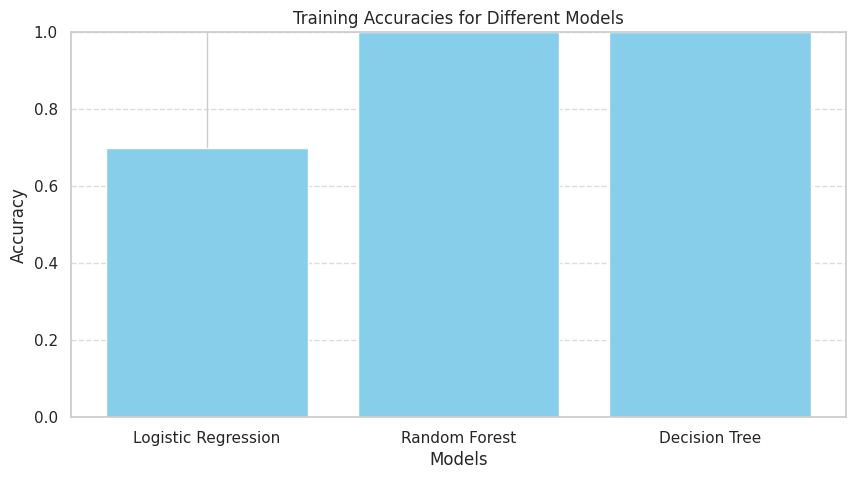

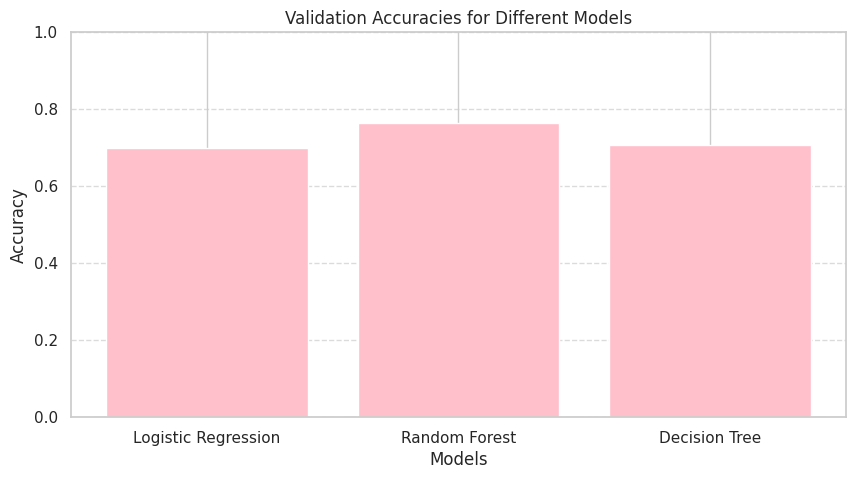

In [ ]:
import matplotlib.pyplot as plt

# Data from the user's results
train_accuracies = {
    "Logistic Regression": 0.6984,
    "Random Forest": 1.0000,
    "Decision Tree": 1.0000
}

val_accuracies = {
    "Logistic Regression": 0.7004,
    "Random Forest": 0.7633,
    "Decision Tree": 0.7080
}

# Plotting training accuracies
plt.figure(figsize=(10, 5))
plt.bar(train_accuracies.keys(), train_accuracies.values(), color='skyblue')
plt.ylim(0, 1)
plt.title('Training Accuracies for Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plotting validation accuracies
plt.figure(figsize=(10, 5))
plt.bar(val_accuracies.keys(), val_accuracies.values(), color='pink')
plt.ylim(0, 1)
plt.title('Validation Accuracies for Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
import pickle
import numpy as np

# Determine the best model based on validation accuracy
best_model_name = max(model_performance, key=lambda k: model_performance[k]["validation_accuracy"])

# Load the best model
with open(f'{best_model_name.replace(" ", "_").lower()}_model.pkl', 'rb') as f:
    best_model = pickle.load(f)

print(f"Loaded the best model: {best_model_name}")


Loaded the best model: Random Forest


In [ ]:
import pandas as pd

# Sample input data (example values for demonstration)
input_data = {
    'Age': 0,
    'Accessibility': 0,
    'Employment': 1,
    'MentalHealth': 0,
    'MainBranch': 0,
    'YearsCode': 10,
    'YearsCodePro': 5,
    'PreviousSalary': 60000,
    'ComputerSkills': 10,
    'NumTechnologies': 5,
    'EdLevel_Skills_undergraduate_50': 0,
    'EdLevel_Skills_undergraduate_51': 0,
    'EdLevel_Skills_undergraduate_53': 0,
    'EdLevel_Skills_undergraduate_6': 0,
    'EdLevel_Skills_undergraduate_7': 0,
    'EdLevel_Skills_undergraduate_8': 0,
    'EdLevel_Skills_undergraduate_9': 0,
    'SkillLevel_Expert': 0,
    'SkillLevel_Intermediate': 0,
    'SkillLevel_Novice': 1,
    # Include all other necessary fields
}

# Convert the input data to a DataFrame
input_df = pd.DataFrame([input_data])

# Find missing columns in the input data
missing_cols = list(set(X_train.columns) - set(input_df.columns))

# Create a DataFrame with missing columns initialized to 0
missing_df = pd.DataFrame(0, index=input_df.index, columns=missing_cols)

# Concatenate the input data with the missing columns
input_df = pd.concat([input_df, missing_df], axis=1)

# Reorder columns to match training data
input_df = input_df[X_train.columns]

# Make prediction
prediction = best_model.predict(input_df)

# Interpret the result
employed_status = "Employed" if prediction[0] == 1 else "Not Employed"
print(f"The prediction for the given input is: {employed_status}")


The prediction for the given input is: Not Employed
